In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore 


df = pd.read_csv('../data/sierraleone-bumbuna.csv')


## Summary Statistics & Missing-Value Report


In [2]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb', 'RH', 'WSstdev', 'WD' ,'WDstdev', 'BP', 'Cleaning','Precipitation', 'TModA'  ]
print(df[numeric_cols].describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB             WS         WSgust           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691       1.146113       1.691606      26.319394   
std       288.889073       1.239248       1.617053       4.398605   
min         0.000000       0.000000       0.000000      12.300000   
25%         0.000000       0.0000

In [3]:
missing_report = df.isna().sum() / len(df) * 100  # Percentage of missing values
missing_above_5 = missing_report[missing_report > 5]  # Filter > 5%

print("Columns with >5% missing values (%):")
print(missing_above_5)

Columns with >5% missing values (%):
Comments    100.0
dtype: float64


## Outlier Detection & Basic Cleaning

### Outliner detection

In [4]:
cols_to_check = ['GHI', 'DNI', 'DHI']

z_scores = df[cols_to_check].apply(zscore, nan_policy='omit')
outliers_mask = np.abs(z_scores) > 3
print("=== Outliers per Column (|Z-score| > 3) ===")
for col in cols_to_check:
    col_outliers = df.loc[outliers_mask[col], col]
    
    if not col_outliers.empty:
        print(f"\nColumn: {col}")
        print("-----------------")
        print(col_outliers)
    else:
        print(f"\nColumn: {col} - No outliers detected.")


=== Outliers per Column (|Z-score| > 3) ===

Column: GHI
-----------------
663       1119.0
671       1154.0
780       1111.0
781       1126.0
782       1151.0
           ...  
517747    1134.0
517748    1162.0
517749    1163.0
517750    1125.0
517823    1109.0
Name: GHI, Length: 2477, dtype: float64

Column: DNI
-----------------
699       815.0
700       820.0
701       830.0
702       820.0
703       833.0
          ...  
519235    808.0
519236    804.0
519237    801.0
519238    795.9
519239    786.7
Name: DNI, Length: 7586, dtype: float64

Column: DHI
-----------------
653       594.3
654       599.6
655       605.9
656       603.9
657       598.8
          ...  
517728    682.1
517729    669.3
517730    645.6
517731    625.9
517732    603.5
Name: DHI, Length: 2986, dtype: float64


### Missing values

In [5]:
missing_report = df[cols_to_check].isna().sum()
print("Missing values:\n", missing_report[missing_report > 0])

Missing values:
 Series([], dtype: int64)


### Incorrect entries

In [6]:
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'RH', 'WS', 'WSgust', 'WSstdev', 'BP', 'Cleaning', 'Precipitation']:
    negatives = (df[col] < 0).sum()
    if negatives > 0:
        print(f"Warning: {negatives} negative values found in '{col}'")


## Cleaning

In [7]:

## invalid negative values
invalid_negative_cols = [
    'GHI', 'DNI', 'DHI'
]
# Replace negatives with NaN
df[invalid_negative_cols] = df[invalid_negative_cols].applymap(lambda x: x if x >= 0 else None)


/tmp/ipykernel_898974/3401128404.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[invalid_negative_cols] = df[invalid_negative_cols].applymap(lambda x: x if x >= 0 else None)


In [8]:
## fix outliers
df[cols_to_check] = df[cols_to_check].mask(outliers_mask, np.nan)

In [9]:
## Dropping the Empty Comments Column

df.drop(columns=['Comments'], inplace=True)

## Export the Cleaned DataFrame

In [10]:
output_path = "../data/sierraleone-bumbuna_clean.csv"
df.to_csv(output_path)

df_clean = pd.read_csv('../data/benin-malanville_clean.csv')
df_clean.describe()

,Unnamed: 0,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.00000,266664.000000,249613.000000,262680.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,262799.50000,476.477999,352.575567,225.162167,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,151727.79508,320.293849,280.657284,143.824953,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,131399.75000,176.800000,54.100000,116.300000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,262799.50000,474.000000,345.700000,210.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,394199.25000,771.600000,602.900000,318.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,525599.00000,1233.000000,952.300000,591.400000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


## Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.


In [17]:
df_clean = pd.read_csv('../data/sierraleone-bumbuna_clean.csv', parse_dates=["Timestamp"])


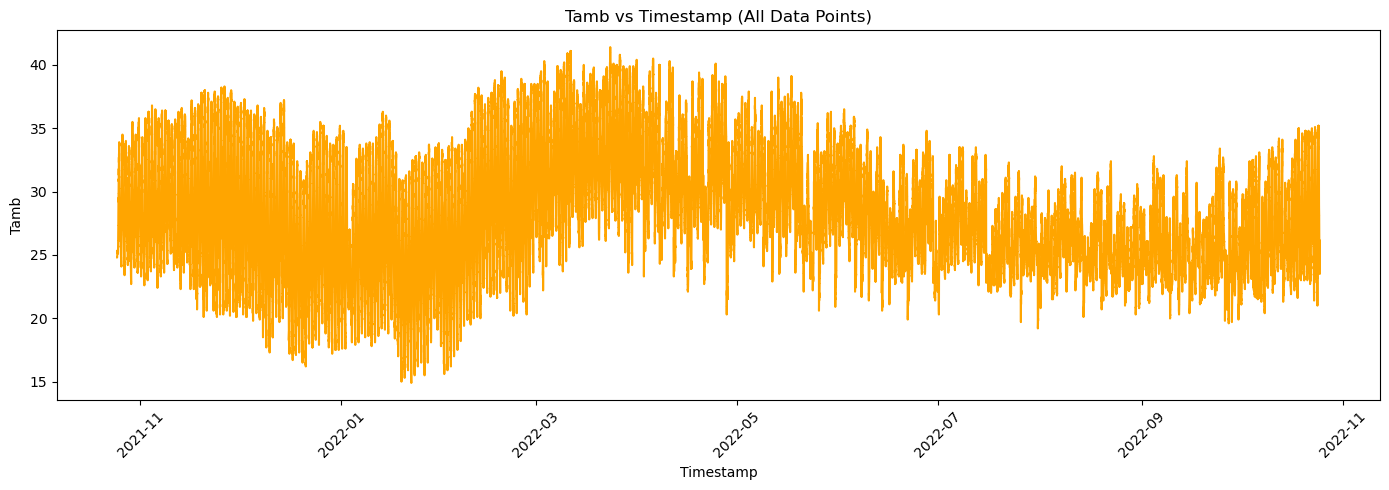

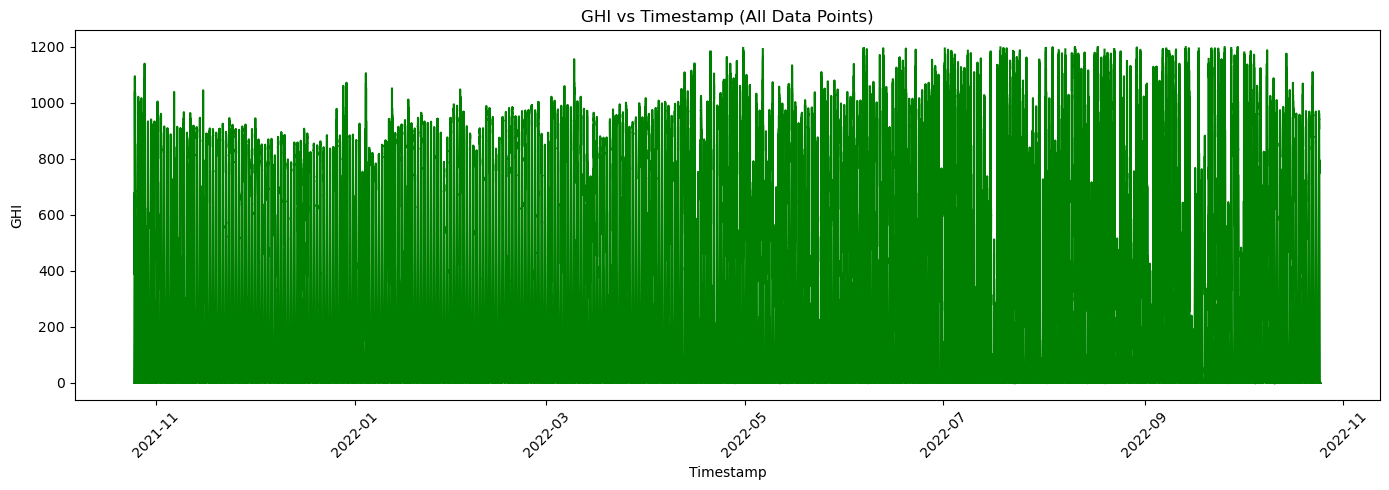

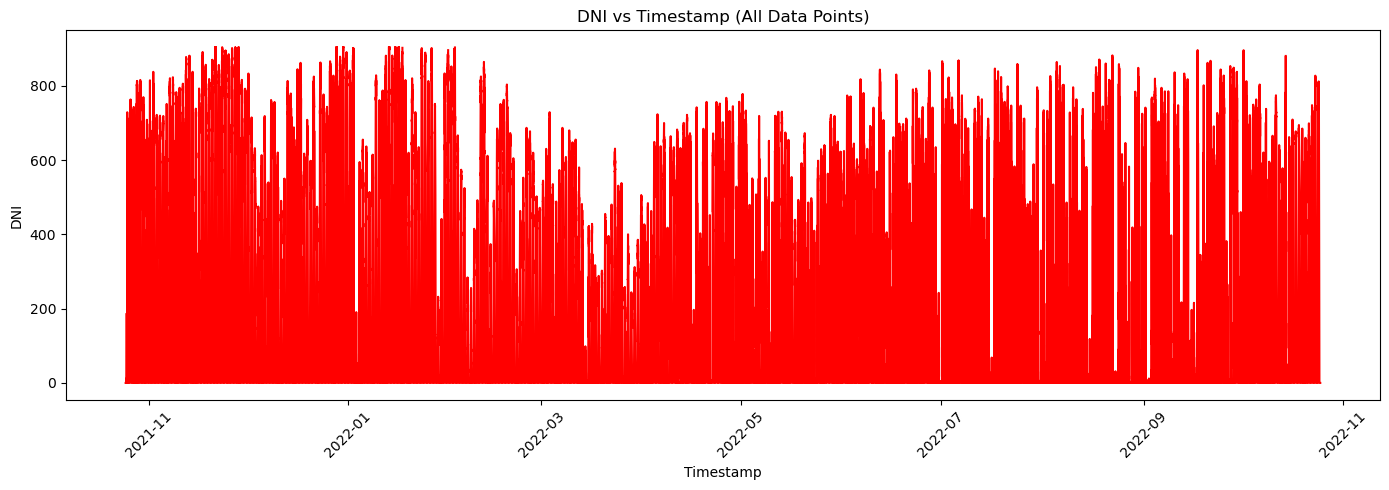

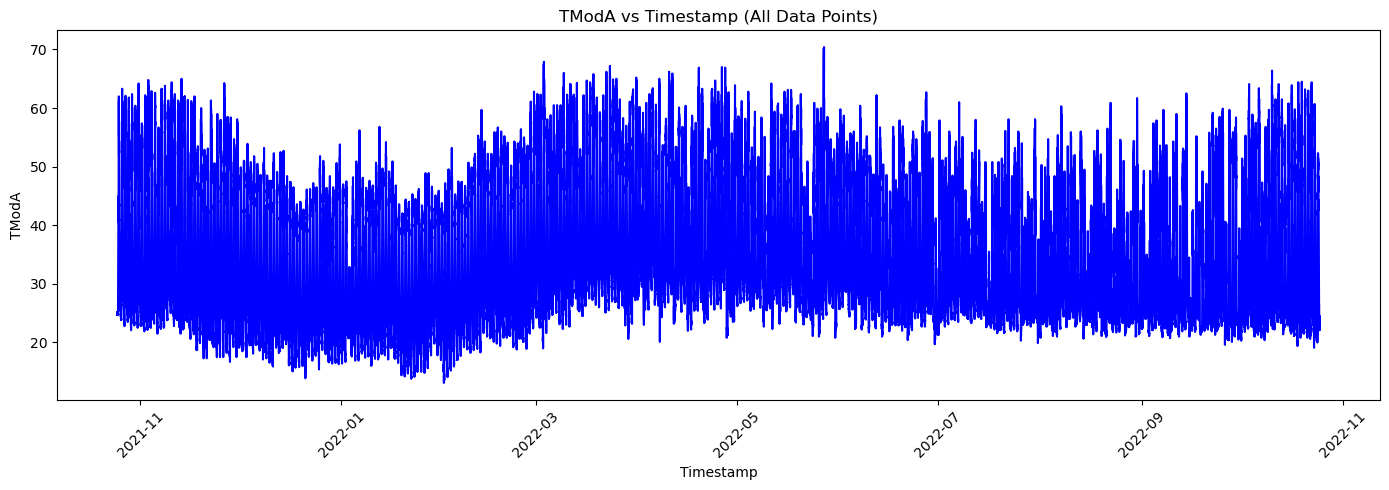

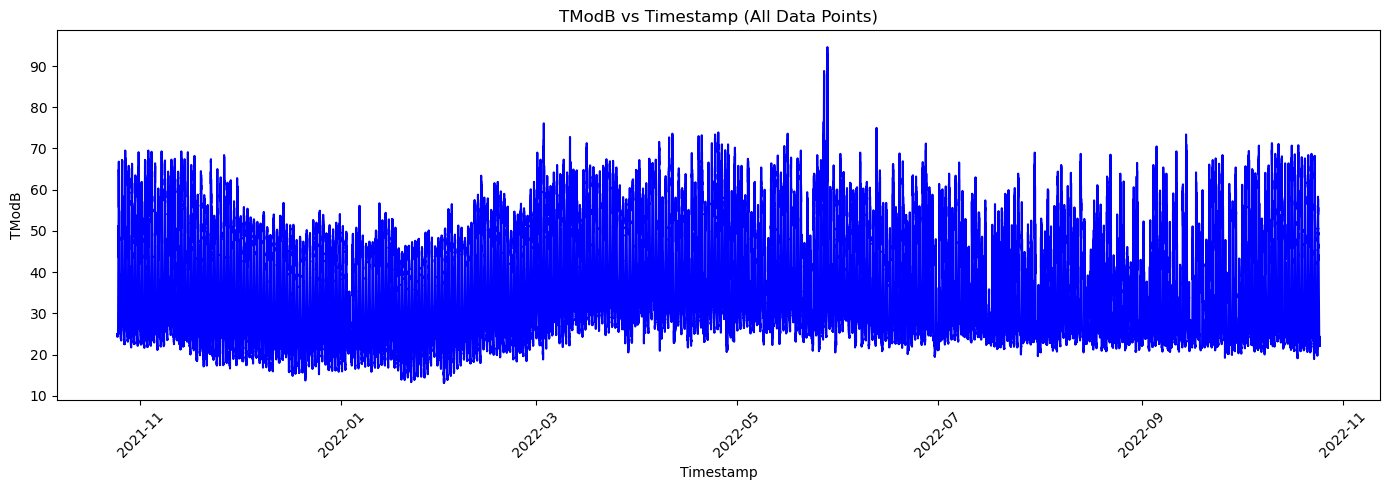

In [9]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['Tamb'], color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Tamb')
plt.title('Tamb vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], color='green')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.title('GHI vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['DNI'], color='red')
plt.xlabel('Timestamp')
plt.ylabel('DNI')
plt.title('DNI vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['TModA'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('TModA')
plt.title('TModA vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['TModB'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('TModB')
plt.title('TModB vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation & Relationship Analysis

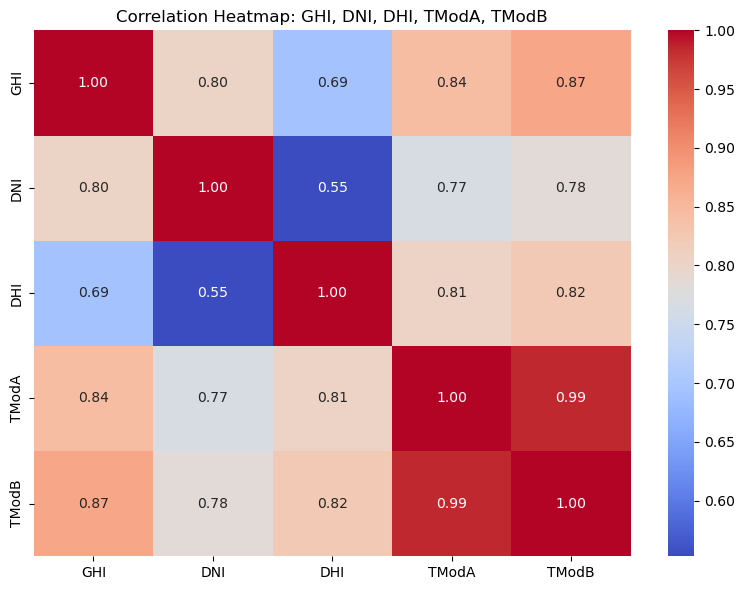

In [19]:
Correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
Correlation_matrix = df_clean[Correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.tight_layout()
plt.show()

## Scatter plot

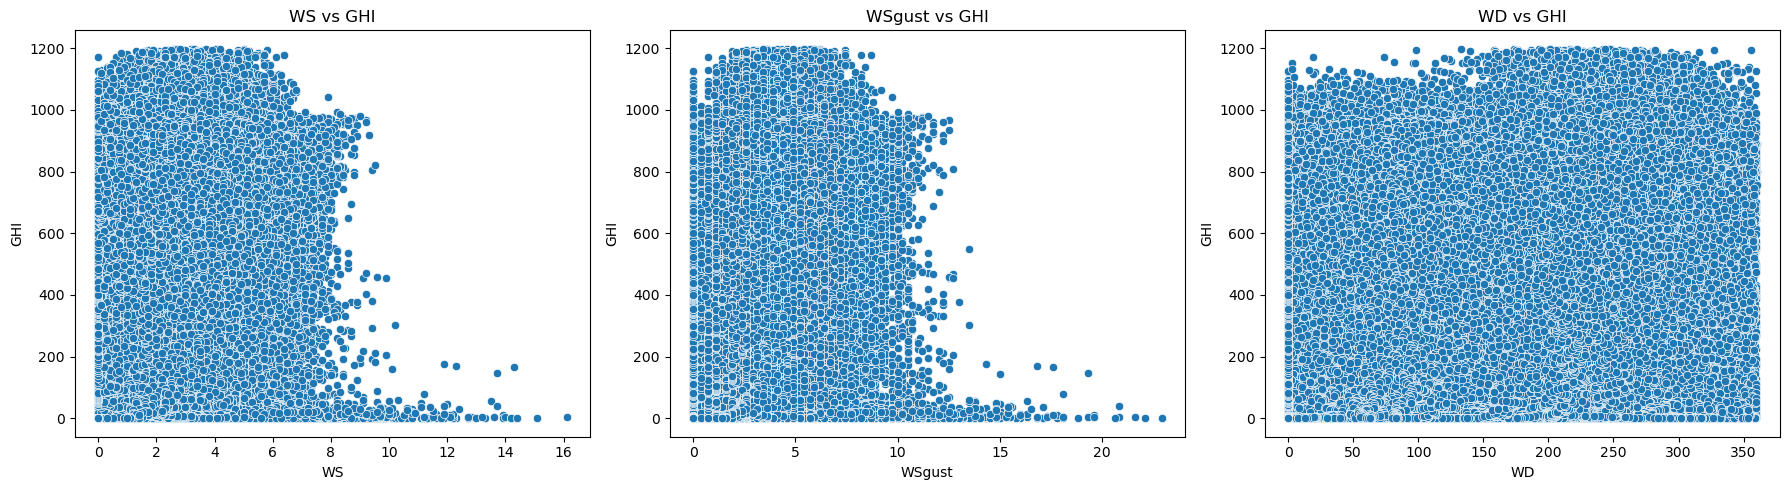

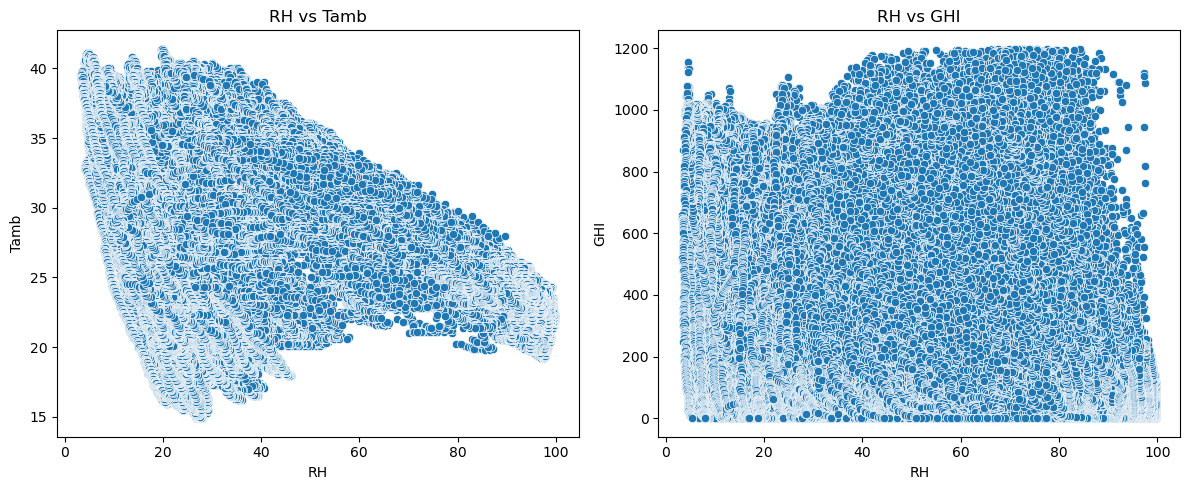

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df_clean, x='WS', y='GHI', ax=axs[0])
axs[0].set_title('WS vs GHI')
sns.scatterplot(data=df_clean, x='WSgust', y='GHI', ax=axs[1])
axs[1].set_title('WSgust vs GHI')
sns.scatterplot(data=df_clean, x='WD', y='GHI', ax=axs[2])
axs[2].set_title('WD vs GHI')
plt.tight_layout()
plt.show()

# Scatter: RH vs Tamb and RH vs GHI
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', ax=axs[0])
axs[0].set_title('RH vs Tamb')
sns.scatterplot(data=df_clean, x='RH', y='GHI', ax=axs[1])
axs[1].set_title('RH vs GHI')
plt.tight_layout()
plt.show()

## Temperature Analysis

In [ ]:

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', color='coral')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

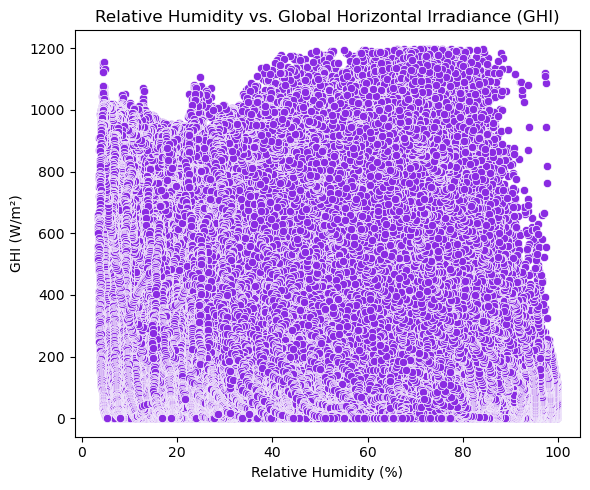

In [25]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_clean, x='RH', y='GHI', color='blueviolet')
plt.title('Relative Humidity vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()


## Bubble chart

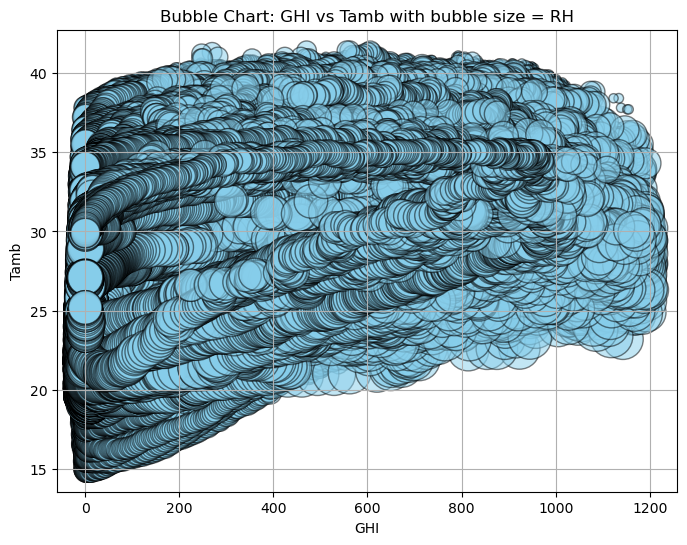

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_clean['GHI'], 
    df_clean['Tamb'], 
    s=df_clean['RH'] * 10,  
    alpha=0.5, 
    c='skyblue', 
    edgecolors='black'
)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb with bubble size = RH')
plt.grid(True)
plt.show()